# Analysis from Brian Goggin (uses newly-produced data as of September 2017)

In [1]:
import pandas as pd
import logging
import dateutil
from dateutil import parser
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', 500)

In [2]:
#import dataset of project times from "data" folder
file = "../../../data/cleaned/all_quarters__one_record_per_project.csv"
df = pd.read_csv(file)

In [3]:
#First, filter out those projects that are exclusively non-residential (defined as those without units)
df = df[df['units'] > 0]

In [4]:
#Next, keep only those that reached completion at some point over the time period
df=df[pd.notnull(df['comp_date'])]

In [5]:
df.head()

,Unnamed: 0,BP_date,address,apn,best_date,best_stat,comp_date,con_date,dbi_permit,first_date,first_project_record_date,firstfiled,latest_project_record_date,latest_project_status,project_dates,project_duration_days,project_statuses,report_quarter,report_year,status,units,unitsnet,x,y
0,25696,2015-05-13,259 CLARA ST,3753042,2016-04-22,CONSTRUCTION,10/01/2016,2016-04-22,2.01305E+11,2013-05-16,2013-05-16,2013-05-16,2016-04-22,CONSTRUCTION,"('2013-05-16', '2013-05-16', '2013-05-16', '20...",1234.0,"('BP FILED', 'BP FILED', 'BP FILED', 'BP FILED...",3,2016,Under Construction,8.0,8.0,37.778347,-122.403506
8,29014,NaN,6044 GEARY BL,1456023,2016-11-29,CONSTRUCTION,04/01/2017,2016-06-16,2.01409E+11,2014-09-05,2016-06-16,NaN,2016-11-29,CONSTRUCTION,"('2016-06-16', '2016-08-26', '2016-11-29', '20...",939.0,"('CONSTRUCTION', 'CONSTRUCTION', 'CONSTRUCTION...",1,2017,Under Construction,3.0,3.0,37.780413,-122.484482
12,4754,NaN,1671 11TH AV,1932012,2006-03-07,CONSTRUCTION,01/01/2011,2006-03-07,2.0031E+11,2003-10-10,2006-03-07,2003-10-10,2006-03-07,CONSTRUCTION,"('2006-03-07', '2006-03-07')",2640.0,"('CONSTRUCTION', 'CONSTRUCTION')",4,2010,Under Construction,2.0,NaN,-122.468152,37.757083
20,11125,NaN,4227 LINCOLN WY,1707047,2008-03-25,CONSTRUCTION,04/01/2013,2008-03-25,200306207365,2003-06-20,2008-03-25,2003-06-20,2008-03-25,CONSTRUCTION,"('2008-03-25', '2008-03-25', '2008-03-25', '20...",3573.0,"('CONSTRUCTION', 'CONSTRUCTION', 'CONSTRUCTION...",1,2013,Under Construction,1.0,1.0,37.764167,-122.503298
31,2303,NaN,539 FAXON AV,6934002,2009-07-15,CONSTRUCTION,04/01/2010,2009-07-15,2.00705E+11,2007-05-22,2009-07-15,2007-05-22,2009-07-15,CONSTRUCTION,"('2009-07-15', '2009-07-15', '2009-07-15')",1045.0,"('CONSTRUCTION', 'CONSTRUCTION', 'CONSTRUCTION')",1,2010,Under Construction,1.0,NaN,-122.460415,37.724102


In [6]:
#convert completion date to date variables type
df['project_duration_days'].describe()

count     943.000000
mean     1664.487805
std      1152.863825
min       -20.000000
25%       796.500000
50%      1373.000000
75%      2318.500000
max      8807.000000
Name: project_duration_days, dtype: float64

In [7]:
df['project_time_years']=df['project_duration_days']/365

In [8]:
df['project_time_years'].describe()

count    943.000000
mean       4.560241
std        3.158531
min       -0.054795
25%        2.182192
50%        3.761644
75%        6.352055
max       24.128767
Name: project_time_years, dtype: float64

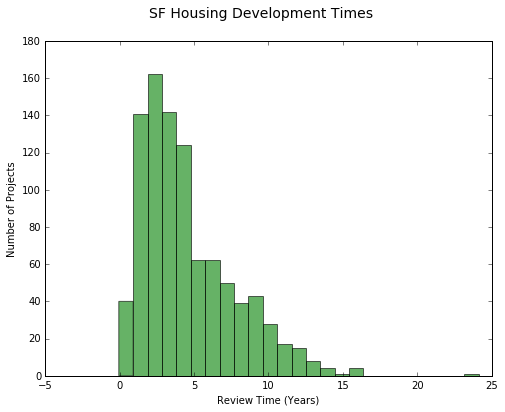

In [9]:
plt.figure(1, figsize=(8,6), )
plt.suptitle('SF Housing Development Times', fontsize=14)
plt.xlabel('Review Time (Years)')
plt.ylabel('Number of Projects')
ax = plt.hist(df['project_time_years'], bins=25, alpha=.6, color='g')
plt.show()

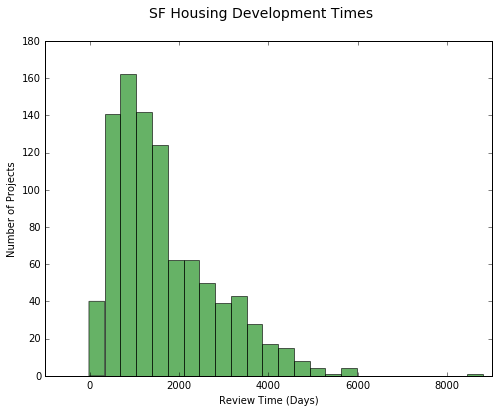

In [10]:
plt.figure(1, figsize=(8,6), )
plt.suptitle('SF Housing Development Times', fontsize=14)
plt.xlabel('Review Time (Days)')
plt.ylabel('Number of Projects')
ax = plt.hist(df['project_duration_days'], bins=25, alpha=.6, color='g')
plt.show()

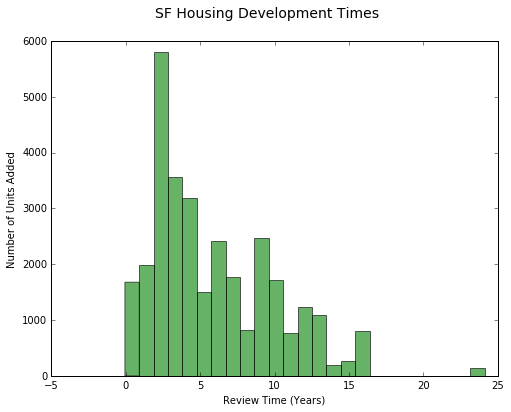

In [14]:
#Create dataset of net units added with 
list = []
uniqueid = 0
for index, row in df.iterrows():
    amount = int(row['units'])
    for units in range(0, amount):
        dictionary = {}
        dictionary['id']=uniqueid+1
        dictionary['time']=row['project_time_years']
        list.append(dictionary)
        uniqueid=uniqueid+1
df_units = pd.DataFrame(list)

plt.figure(1, figsize=(8,6), )
plt.suptitle('SF Housing Development Times', fontsize=14)
plt.xlabel('Review Time (Years)')
plt.ylabel('Number of Units Added')
ax = plt.hist(df_units['time'], bins=25, alpha=.6, color='g')
plt.show()

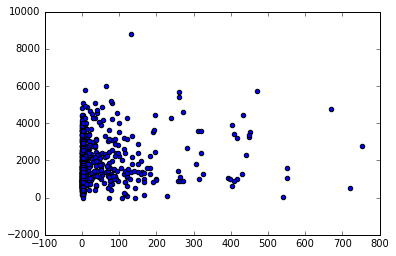

In [15]:
plt.scatter(df['units'], df['project_duration_days'])

In [16]:
# Top 5 longest projects
df.sort_values('project_time_years', ascending = False)[0:5]

,Unnamed: 0,BP_date,address,apn,best_date,best_stat,comp_date,con_date,dbi_permit,first_date,first_project_record_date,firstfiled,latest_project_record_date,latest_project_status,project_dates,project_duration_days,project_statuses,report_quarter,report_year,status,units,unitsnet,x,y,project_time_years
102,18560,NaN,833-881 JAMESTOWN,4991277,2007-09-17,CONSTRUCTION,04/01/2015,2007-09-17,9924080S,1991-02-19,2007-09-17,1991-02-19,2007-09-17,CONSTRUCTION,"('2007-09-17', '2007-09-17', '2007-09-17', '20...",8807.0,"('CONSTRUCTION', 'CONSTRUCTION', 'CONSTRUCTION...",1,2015,Under Construction,132.0,14.0,37.717174,-122.392222,24.128767
1954,26437,NaN,POTRERO1010 (BLDG 1 OF 2),3833001,2016-05-26,CONSTRUCTION,10/01/2016,2016-05-26,2.01112E+11,2000-05-18,2016-05-26,2000-05-18,2016-05-26,CONSTRUCTION,"('2016-05-26', '2016-05-26')",5980.0,"('CONSTRUCTION', 'CONSTRUCTION')",3,2016,Under Construction,65.0,65.0,37.767108,-122.396595,16.383562
409,17247,2008-11-07,1179 TENNESSEE ST,4172053,2014-12-18,CONSTRUCTION,01/01/2015,2014-03-21,9902819.0,1999-02-11,2008-11-07,2001-04-26,2014-12-18,CONSTRUCTION,"('2008-11-07', '2009-11-03', '2009-11-03', '20...",5803.0,"('BP REINSTATED', 'BP REINSTATED', 'BP REINSTA...",4,2014,Under Construction,8.0,8.0,37.755993,-122.389058,15.898630
2132,21263,2012-09-07,1000 16TH ST,3833001,2015-12-24,CONSTRUCTION,01/01/2016,2012-09-07,201112070227.0,2000-05-18,2012-07-13,2000-05-18,2015-12-24,CONSTRUCTION,"('2012-07-13', '2012-07-13', '2012-07-13', '20...",5706.0,"('PL APPROVED', 'PL APPROVED', 'PL APPROVED', ...",4,2015,Under Construction,470.0,470.0,37.767108,-122.396595,15.632877
2103,24161,NaN,1634 - 1690 PINE ST,0647007,2016-07-01,CONSTRUCTION,07/01/2016,2016-01-14,201312000000.0,2000-11-27,2016-01-14,2000-11-27,2016-07-01,CONSTRUCTION,"('2016-01-14', '2016-03-29', '2016-07-01')",5695.0,"('CONSTRUCTION', 'CONSTRUCTION', 'CONSTRUCTION')",2,2016,Under Construction,260.0,260.0,37.789593,-122.422951,15.602740


In [17]:
df.head()

,Unnamed: 0,BP_date,address,apn,best_date,best_stat,comp_date,con_date,dbi_permit,first_date,first_project_record_date,firstfiled,latest_project_record_date,latest_project_status,project_dates,project_duration_days,project_statuses,report_quarter,report_year,status,units,unitsnet,x,y,project_time_years
1,8574,NaN,350 LINDEN ST,0817069,2014-01-17,CONSTRUCTION,10/01/2014,2013-07-12,200710185839,2007-10-18,2013-07-12,2007-10-18,2014-01-17,CONSTRUCTION,"('2013-07-12', '2013-07-12', '2014-01-17', '20...",2540.0,"('CONSTRUCTION', 'CONSTRUCTION', 'CONSTRUCTION...",3,2014,Under Construction,6.0,6.0,37.776427,-122.423498,6.958904
3,5396,NaN,1844 MARKET ST,0871016,2013-08-26,CONSTRUCTION,10/01/2013,2007-07-17,200607146588,2005-06-01 07:00:00,2007-07-17,2005-06-01,2013-08-26,CONSTRUCTION,"('2007-07-17', '2007-07-17', '2007-07-17', '20...",3043.0,"('CONSTRUCTION', 'CONSTRUCTION', 'CONSTRUCTION...",3,2013,Under Construction,113.0,113.0,37.771461,-122.424688,8.336986
4,7405,2013-06-18,2401 16TH ST,3965001,2014-06-30,CONSTRUCTION,07/01/2014,2013-12-10,201208248160,2008-10-09 07:00:00,2011-04-21,2008-10-09,2014-06-30,CONSTRUCTION,"('2011-04-21', '2011-04-21', '2012-08-24', '20...",2090.0,"('PL APPROVED', 'PL APPROVED', 'BP FILED', 'BP...",2,2014,Under Construction,12.0,12.0,37.765523,-122.410614,5.726027
7,13704,2012-09-24,551 22ND AV,1565006A,2016-01-11,CONSTRUCTION,01/01/2016,2014-05-22,201012025978.0,2010-12-02,2010-12-02,2010-12-02,2016-01-11,CONSTRUCTION,"('2010-12-02', '2010-12-02', '2012-09-24', '20...",1856.0,"('BP FILED', 'BP FILED', 'BP APPROVED', 'BP AP...",4,2015,Under Construction,2.0,2.0,37.777328,-122.481640,5.084932
12,13540,2012-11-26,200 COLEMAN ST,4591C098,2016-01-07,CONSTRUCTION,01/01/2016,2014-06-23,200912223674.0,2009-12-22,2012-11-26,2009-12-22,2016-01-07,CONSTRUCTION,"('2012-11-26', '2012-11-26', '2012-11-26', '20...",2201.0,"('BP ISSUED', 'BP ISSUED', 'BP ISSUED', 'CONST...",4,2015,Under Construction,12.0,12.0,37.727648,-122.368909,6.030137


In [17]:
df['unitsnet'].sum()

27641.0